# M2与名义GDP增速差与股市的关系

M2相对名义GDP增速高则说明市场资金风险偏好低，股市估值应该提升，反之估值应该下降

In [1]:
from WindPy import w
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

# 获取M2与GDP数据

In [22]:
data = w.edb("M0001385,M5567876", '2000-01-01', '2018-10-10')

In [23]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['M2', 'GDP'])

In [24]:
df.to_excel('../data/M2-GDP.xlsx')

In [25]:
df = pd.read_excel('../data/M2-GDP.xlsx', index_col=0)

In [26]:
df = df.fillna(method='ffill').dropna()

In [27]:
df.tail()

,M2,GDP
2018-06-30,8.0,220178.0
2018-07-31,8.5,220178.0
2018-08-31,8.2,220178.0
2018-09-30,8.3,231937.7
2018-10-31,8.0,231937.7


In [28]:
df['GDP pct'] = df['GDP'].pct_change(12)

In [29]:
df.tail()

,M2,GDP,GDP pct
2018-06-30,8.0,220178.0,0.097823
2018-07-31,8.5,220178.0,0.097823
2018-08-31,8.2,220178.0,0.097823
2018-09-30,8.3,231937.7,0.096137
2018-10-31,8.0,231937.7,0.096137


In [37]:
diff = df['M2'] - df['GDP pct'] * 100

# 获取股票市盈率

In [38]:
data = w.wsd('000300.SH', 'pe_ttm,pb_lf', '2000-01-01', '2018-10-10')

In [39]:
val = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['pe', 'pb'])

In [40]:
val.index = pd.to_datetime(val.index)

In [41]:
val = val.resample('M').last()

In [47]:
diff = diff[diff.index >= val.dropna().index[0]]

# 画图展示

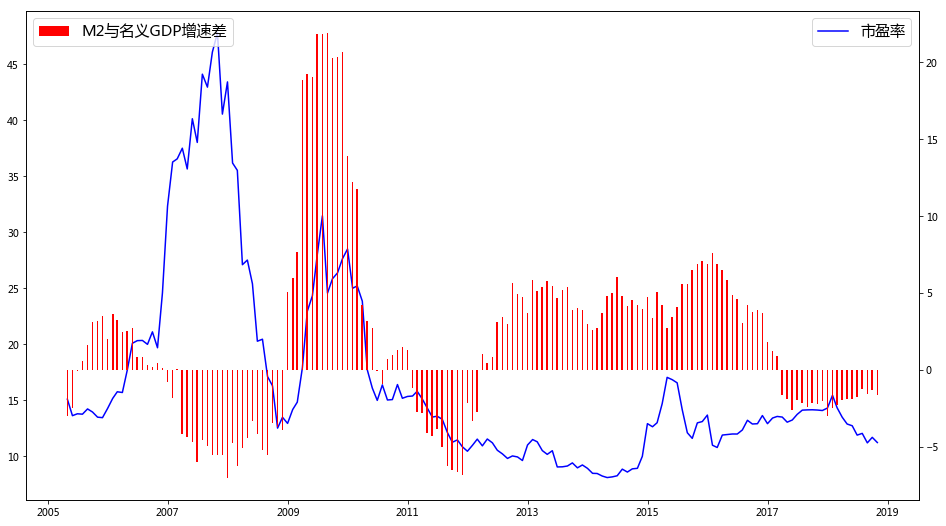

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(val['pe'], color='blue', label=u'市盈率')
# ax.plot(val['pe'], color='blue', label=u'市净率')
ax.legend(fontsize=15)
ax1 = ax.twinx()
ax1.bar(diff.index, diff, label=u'M2与名义GDP增速差', color='red', width=10)
ax1.legend(loc='upper left', fontsize=15)